## Project 2:  using Multilayer Neural Network

Prima Indians dataset has the following measurement of their blood sugar level , BMI , Insulin level that is labeled with that person is at risk of diabetes or not within five years of the initial measurement. Using machine learning ,Health care Industry is revolutionizing (not only that)..The dataset is provided by the National Institute of Diabetes and Digestive and Kidney Diseases (and hosted by Kaggle).


Before modelling the dataset with any Algorithm ,.first we need to inspect insights from the data that we have.    
Classification

In [333]:
#importing libraries 
import numpy as np                # matrix representation
import pandas as pd               # data processing
import matplotlib.pyplot as plt   # data visualization
import seaborn as sns             # high-level data visualization
%matplotlib inline            

from sklearn.preprocessing import StandardScaler         #ScikitLearn - for standardizing data to the curve
from sklearn.model_selection import train_test_split     #scikitLearn - for splitting dataset into training and testing
from sklearn.metrics import confusion_matrix , roc_curve           #classifying metrics

from keras.models import Sequential    #keras - Building NN ,   [Sequential - stacking layers on top of one another]              
from keras.layers import Dense         #to create hidden layers [Dense - connected with every other units]

In [265]:
#using pandas to get the dataset from csv file that we donloaded from kaggle
data = pd.read_csv('diabetes.csv')

In [266]:
#to see the first five rows from data
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Here ,            
features        - Pregnencies , Glucose , BloodPressure , SkinThickness , Insulin , BMI , DPF , Age                 
target or label - Outcome (0 - No Diabetes , 1 - Diabetes)

In [267]:
#to get no.of people's data and no.of features
data.shape

(768, 9)

The dataset has 768 females data , 8 measurements , 1 outcome (whether risk at diabetes or not).

In [268]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [269]:
#first person's measurements
data.loc[0]

Pregnancies                   6.000
Glucose                     148.000
BloodPressure                72.000
SkinThickness                35.000
Insulin                       0.000
BMI                          33.600
DiabetesPedigreeFunction      0.627
Age                          50.000
Outcome                       1.000
Name: 0, dtype: float64

dataset containing 500 females that has NO risk of diabetes and 268 females with having risk of diabetes.

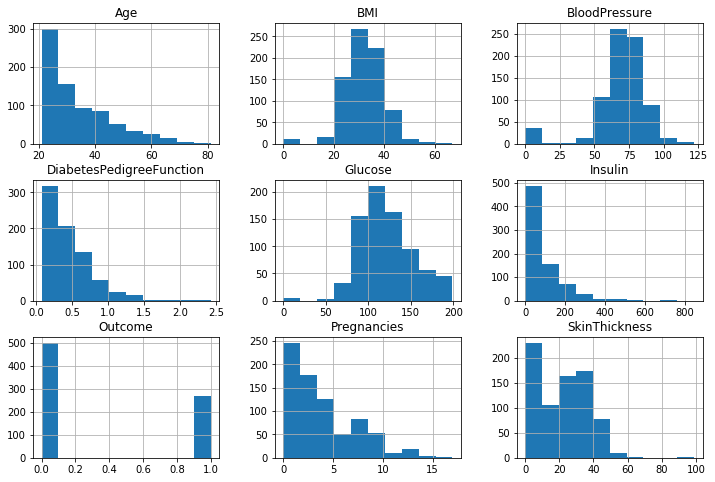

In [270]:
#visualizing the histogram of complete features to gain more insights in the data
data.hist(figsize = (12,8))
plt.show()

from the histogram plot we can visualize that ,            
Age - the dataset contains most of the young aged women ,                
BMI , BloodPressure , Glucose is Normally distributed. And mostly ,these features has 0 values (it should not be) , may be those have missing values.. lets check while  preprocessing data        
Pregnencies - has almost 15 .. its a little shock , it may contains outliers it affects our model ..


In [271]:
data.columns.tolist()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\ProgramData\Anaconda3\lib\si

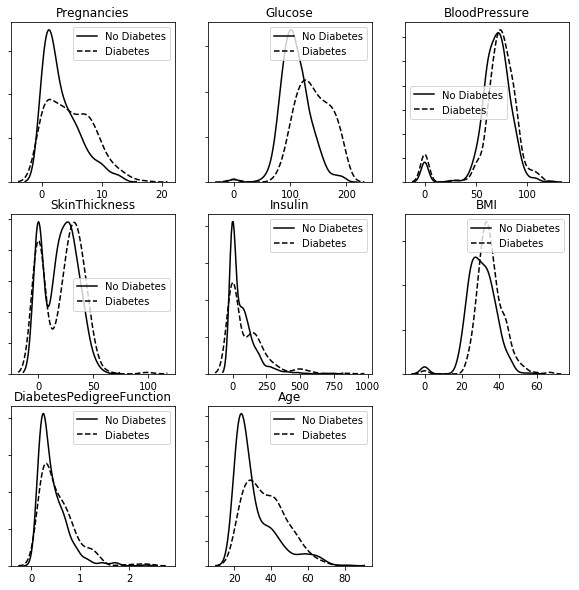

In [272]:
# seaborn has a data visualization that follows Density plot to visualize the relationship between variables and the outcome .
plt.subplots(3,3,figsize=(10,10))

# Plot a density plot for each variable
for idx, col in enumerate(data.columns):
    ax = plt.subplot(3,3,idx+1)
    ax.yaxis.set_ticklabels([])
    sns.distplot(data.loc[data.Outcome == 0][col], hist=False, axlabel= False, 
    kde_kws={'linestyle':'-',  
    'color':'black', 'label':"No Diabetes"})
    sns.distplot(data.loc[data.Outcome == 1][col], hist=False, axlabel= False, 
    kde_kws={'linestyle':'--', 
    'color':'black', 'label':"Diabetes"})
    ax.set_title(col)

# Hide the 9th subplot (bottom right) since there are only 8 plots
plt.subplot(3,3,9).set_visible(False)
plt.show()

from the distplot ,we gain insights like
In Glucose - people with No diabetes has Normally distributed and its mean is around 100mg/dL. people with diabetes has a mean of 150mg/dL       
from this we can get ,if the person having high BMI,Glucose,and are older they tends to have diabetes..           

BloodPressure and SkinThickness has same values for both diabetes and Non-diabetes people,then these both features are not useful predictors for the model

In [273]:
#DATA PREPROCESSING

1. check whether there is a missing values in the dataset - it lowers the performance of the model.                 
2. Scaling the input features to get the model performance better .                           
it should be done becoz while visualizing histogram we see DPF has values btw (0 , 2.5) and Insulin has values btw (0 , 700).

In [274]:
#checking missing values in the dataset
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There is no missing values but histogram shows in Glucose ,BMI,BloodPressure,Insulin has 0 values in the dataset but it is not missing values..,ie,.Wgether there be a persons who are not used to give their measurements or else,there may be some technical default in the machine ..        
A better way to check the missing values is,

In [275]:
#This gives min ,max ,mean,quartile values to get insghts of data
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


See, every feature has 768 values (no missing values) , but seeing quite intutively the minimum values in Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI has 0 in it .(this should not be valid data for us).          
We need to do some techniques to get rid of that missing data (0 values).

In [276]:
#This is done by
print('data that has a total number of 0 values in it')
print()
for col in data.columns:
    print(col + ' : ' + str(data.loc[data[col] == 0].shape[0]))

data that has a total number of 0 values in it

Pregnancies : 111
Glucose : 5
BloodPressure : 35
SkinThickness : 227
Insulin : 374
BMI : 11
DiabetesPedigreeFunction : 0
Age : 0
Outcome : 500


Insulin has half of the missing value (0's) in it. This is done by replacing those 0's with NaN value to work easily in pandas 
Leaving pregnancies coz, there is a chance that a women have no children.

In [277]:
#replacing those 0's to NaN values
data['Glucose'].replace(0,np.NaN,inplace = True)
data['BloodPressure'].replace(0,np.NaN,inplace = True)
data['SkinThickness'].replace(0,np.NaN,inplace = True)
data['Insulin'].replace(0,np.NaN,inplace = True)
data['BMI'].replace(0,np.NaN,inplace = True)

In [278]:
#again checking with columns
for col in data.columns:
    print(col + ' : '+ str(data.loc[data[col] == 0].shape[0]))

Pregnancies : 111
Glucose : 0
BloodPressure : 0
SkinThickness : 0
Insulin : 0
BMI : 0
DiabetesPedigreeFunction : 0
Age : 0
Outcome : 500


In [279]:
#Now
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Techniques to avoid Missing values,            
1. These missing NaN is done by making the mean or median or mode of the seperate columns and add those to the missing NaN values         
2. droping those rows that contains missing values in it.  

In [280]:
# Here we cant drop those rows becoz there are so many missng values in the data.SO, we can add the mean values to them instead
#replacing those 0's to NaN values
data.fillna(data['Glucose'].mean(),inplace = True)
data.fillna(data['BloodPressure'].mean(),inplace = True)
data.fillna(data['SkinThickness'].mean(),inplace = True)
data.fillna(data['Insulin'].mean(),inplace = True)
data.fillna(data['BMI'].mean(),inplace = True)

In [281]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null float64
BloodPressure               768 non-null float64
SkinThickness               768 non-null float64
Insulin                     768 non-null float64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [282]:
#SCALING THE FEATURES - Data Standardization

#taking features and Label seperately
features = data.drop(columns = 'Outcome',axis=1)
Label = data['Outcome']

In [283]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [284]:
features_scaled

array([[ 0.63994726,  0.86510807, -0.16707962, ..., -0.01072431,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20616153, -0.54521765, ..., -0.56479861,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.0158134 , -0.67126365, ..., -0.82600507,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.0225789 , -0.16707962, ..., -0.59646   ,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14180757, -0.92335567, ..., -0.28776146,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94314317, -0.29312563, ..., -0.26401542,
        -0.47378505, -0.87137393]])

In [285]:
#Splitting dataset for training and testing

In [286]:
X_train,X_test,y_train,y_test = train_test_split(features_scaled,Label,test_size = 0.2)

### Building MultiLayer Network using keras
Here ,there will be 1- input layer , 2-hidden layers and 1-output layer..        
Input Layer    ------>  consist of 8 nodes (features)           
Hidden Layer   ------>  2- hidden layers with arbitary units                        
Output Layer   ------>  1- output layer that predicts (0-No risk of diabetes , 1-risk of diabetes)             

In [287]:
model = Sequential()
model

Actiavtion function :               
ReLU (Rectified Linear Unit) takes negative  values as 0 and it slightly increses from 0 to inf (positive values)           
Sigmoid function - Squashes the values btween 0 and 1 . changes to Probability value            
tanh - Hyperbolic tangent activation function.

We use ReLU function (efficient) for the 1-st hidden layer,tanh for 2nd hidden layer  and sigmoid for output layer(efficient)
  


In [288]:
#adding hidden layers

#1st hidden layer - contains 32 nodes(we need to carefuly select the first layer nodes by trial and error)
model.add(Dense(32 , activation = 'relu' , input_dim = 8))

#2nd hidden layer
model.add(Dense(16 , activation = 'relu'))

#output layer
model.add(Dense(1 , activation = 'sigmoid'))

In [289]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 32)                288       
_________________________________________________________________
dense_15 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 17        
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________


Optimizer - to update weights and biases               
loss      - as this problem tends to classification, we used binary_crossentropy             
metrics   - gives correctness of the model              

In [291]:
#compiling model
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy',metrics = ['accuracy'])

In [292]:
#fitting the model
model.fit(X_train , y_train , epochs = 200 , verbose = True)

Epoch 1/200
614/614 [==============================] - 1s 2ms/step - loss: 0.6148 - acc: 0.6433
Epoch 2/200
614/614 [==============================] - 0s 59us/step - loss: 0.5717 - acc: 0.6450
Epoch 3/200
614/614 [==============================] - 0s 65us/step - loss: 0.5432 - acc: 0.6629
Epoch 4/200
614/614 [==============================] - 0s 64us/step - loss: 0.5261 - acc: 0.7052
Epoch 5/200
614/614 [==============================] - 0s 67us/step - loss: 0.5132 - acc: 0.7329
Epoch 6/200
614/614 [==============================] - 0s 72us/step - loss: 0.5043 - acc: 0.7427
Epoch 7/200
614/614 [==============================] - 0s 83us/step - loss: 0.4972 - acc: 0.7443
Epoch 8/200
614/614 [==============================] - 0s 77us/step - loss: 0.4902 - acc: 0.7508
Epoch 9/200
614/614 [==============================] - 0s 70us/step - loss: 0.4833 - acc: 0.7557
Epoch 10/200
614/614 [==============================] - 0s 75us/step - loss: 0.4771 - acc: 0.7655
Epoch 11/200
614/614 [========

614/614 [==============================] - 0s 80us/step - loss: 0.2681 - acc: 0.8958
Epoch 168/200
614/614 [==============================] - 0s 83us/step - loss: 0.2665 - acc: 0.8990
Epoch 169/200
614/614 [==============================] - 0s 80us/step - loss: 0.2669 - acc: 0.8958
Epoch 170/200
614/614 [==============================] - 0s 79us/step - loss: 0.2644 - acc: 0.8990
Epoch 171/200
614/614 [==============================] - 0s 81us/step - loss: 0.2655 - acc: 0.9023
Epoch 172/200
614/614 [==============================] - 0s 71us/step - loss: 0.2631 - acc: 0.8990
Epoch 173/200
614/614 [==============================] - 0s 77us/step - loss: 0.2611 - acc: 0.8990
Epoch 174/200
614/614 [==============================] - 0s 77us/step - loss: 0.2613 - acc: 0.9023
Epoch 175/200
614/614 [==============================] - 0s 75us/step - loss: 0.2586 - acc: 0.9007
Epoch 176/200
614/614 [==============================] - 0s 73us/step - loss: 0.2599 - acc: 0.8909
Epoch 177/200
614/614 [=

In [310]:
#Evaluating the model using training set
training_scores = model.evaluate(X_train , y_train)
print('Training scores :{} %   '.format(training_scores[1]*100))

614/614 [==============================] - 0s 32us/step
Training scores :91.36807817589576 %   


In [313]:
#Evaluating the model using testing set
test_scores = model.evaluate(X_test , y_test)
print('Training scores :{} %   '.format(test_scores[1]*100))

154/154 [==============================] - 0s 54us/step
Training scores :79.2207789111447 %   


#### While predicting the model tells us that it classifies correctly with 80% accuracy

In [317]:
#confusion matrix
y_test_pred = model.predict_classes(X_test)

In [321]:
cm = confusion_matrix(y_test,y_test_pred)

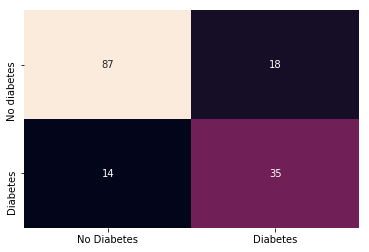

In [328]:
#using heatmap we can visualize effectively
sns.heatmap(cm , annot = True , xticklabels = ['No Diabetes' , 'Diabetes'],yticklabels = ['No diabetes' , 'Diabetes'],
            cbar = False )

In [337]:
#ROC Curve  - for classification (to seek the model perfpormance in a better way)
#sklearn provides roc_curve
y_pred_probability = model.predict(X_test)  #  returns the probability values - sigmoid


In [338]:
fpr , tpr , thresholds = roc_curve(y_test , y_pred_probability)

fpr - false positive rate        
tpr - True positve rate

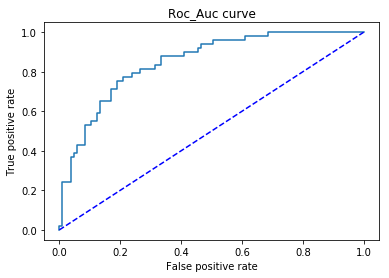

In [379]:
#plotting the roc auc curve 
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'b--')
plt.title('Roc_Auc curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

### The model is good at prediction which gives 80% accuracy